In [29]:
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
human = pd.read_csv('human_all.csv')
data = human.values.tolist()


In [31]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,cos_similarity_x_z_openai,cos_similarity_y_z_openai,cos_similarity_x_z_allmini,cos_similarity_y_z_allmini,cos_similarity_xz_z_allmini,cos_similarity_yz_z_allmini,cos_similarity_xz_z_openai,cos_similarity_yz_z_openai
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5]",0,0,3.388889,0.094874,0.211936,0.060329,0.087431,0.573751,0.549467,0.652128,0.681435
1,boyfriends,adventure movies,a little rough with a happy ending,"[1,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5]",0,0,3.647059,0.245670,0.249587,0.090556,0.261464,0.573453,0.612433,0.702304,0.601073
2,entendres,penetrations,doubled,"[1,2,2,2,3,3,3,3,4,4,4,5,5,5]",1,0,3.285714,0.165928,0.164123,0.081797,0.122832,0.523782,0.483282,0.499349,0.499752
3,men,books,bound in leather,"[2,2,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.944444,0.128757,0.201525,0.095185,0.103097,0.654165,0.604890,0.625618,0.670382
4,coffee,slaves,free,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,5]",0,0,2.823529,0.144526,0.189984,0.185047,0.168820,0.489527,0.365116,0.383272,0.344146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,love,ravines,something deep you climb together,"[1,2,2,2,3,3,3,3,3,5]",1,0,2.700000,0.238799,0.307379,0.180646,0.421264,0.716553,0.715391,0.767007,0.702427
331,sex,tv,"if I don't like what's on, I switch channels","[1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,5,5,5]",0,0,2.421053,0.266943,0.499946,0.288041,0.524635,0.849626,0.915052,0.811691,0.859386
332,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,5,5]",0,0,3.157895,0.122844,0.189974,0.106464,0.229754,0.613787,0.631691,0.646275,0.638633
333,women,tool kits,useful for screwing or hitting,"[1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,4]",0,0,2.611111,0.138110,0.323565,0.066930,0.328701,0.585701,0.669384,0.662918,0.708284


In [32]:
for i in range(5):
    sentence_a = "I like " + human.x[i]
    sentence_b = "I like " + human.y[i]
    sentence_c = human.z[i]
    
    print (sentence_a, "---", sentence_c)
    print (sentence_b, "---", sentence_c)

    print()

I like men --- cheap with a toy on the side
I like McDonalds --- cheap with a toy on the side

I like boyfriends --- a little rough with a happy ending
I like adventure movies --- a little rough with a happy ending

I like entendres --- doubled
I like penetrations --- doubled

I like men --- bound in leather
I like books --- bound in leather

I like coffee --- free
I like slaves --- free



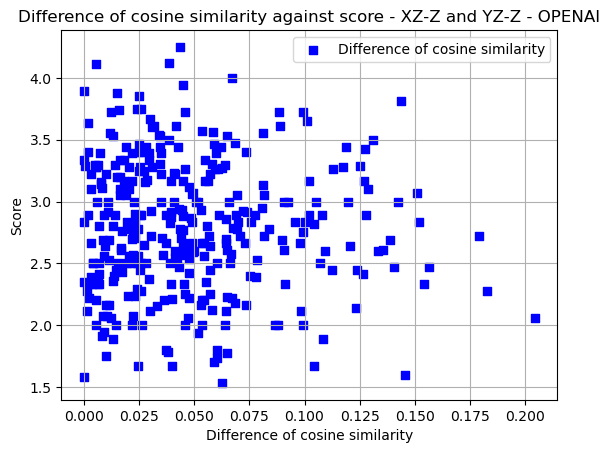

In [33]:
### Difference between XZ-Z and YZ-Z == OPENAI
diff_cosdists = [abs(row[14]-row[13]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(diff_cosdists, rating, label="Difference of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Difference of cosine similarity")
plt.title("Difference of cosine similarity against score - XZ-Z and YZ-Z - OPENAI")
plt.legend()
plt.grid()

# Show plot
plt.show()



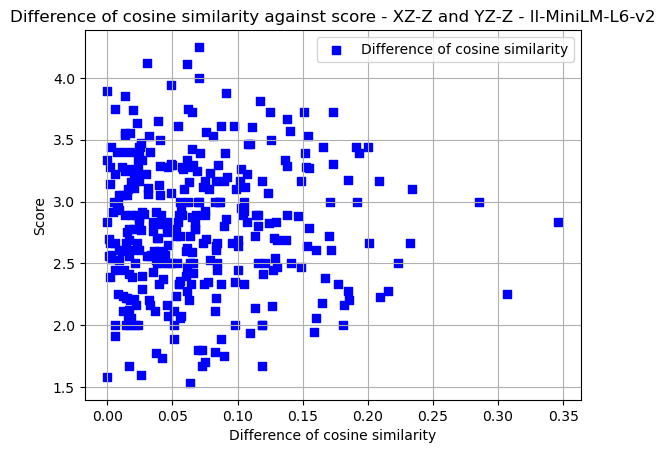

In [34]:
### Difference between XZ-Z and YZ-Z == ll-MiniLM-L6-v2
diff_cosdists = [abs(row[12]-row[11]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(diff_cosdists, rating, label="Difference of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Difference of cosine similarity")
plt.title("Difference of cosine similarity against score - XZ-Z and YZ-Z - ll-MiniLM-L6-v2")
plt.legend()
plt.grid()

# Show plot
plt.show()




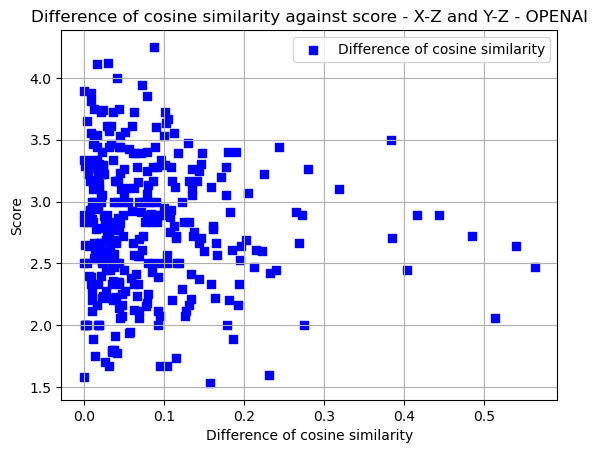

In [35]:
### Difference between X-Z and Y-Z == OPENAI
sum_cosdists = [abs(row[7]-row[8]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Difference of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Difference of cosine similarity")
plt.title("Difference of cosine similarity against score - X-Z and Y-Z - OPENAI")
plt.legend()
plt.grid()

# Show plot
plt.show()




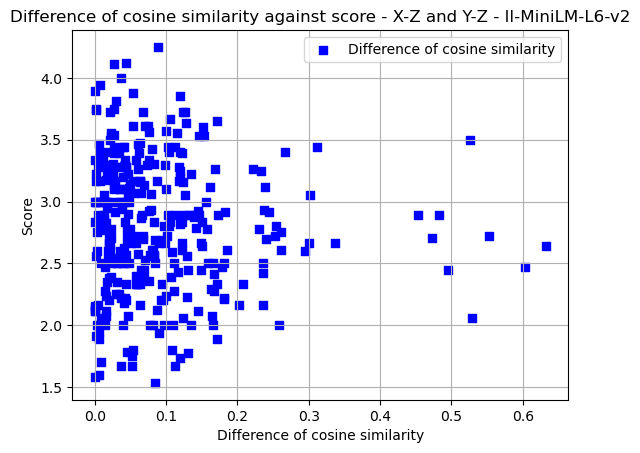

In [36]:
### Difference between X-Z and Y-Z == ll-MiniLM-L6-v2
sum_cosdists = [abs(row[10]-row[9]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Difference of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Difference of cosine similarity")
plt.title("Difference of cosine similarity against score - X-Z and Y-Z - ll-MiniLM-L6-v2")
plt.legend()
plt.grid()

# Show plot
plt.show()


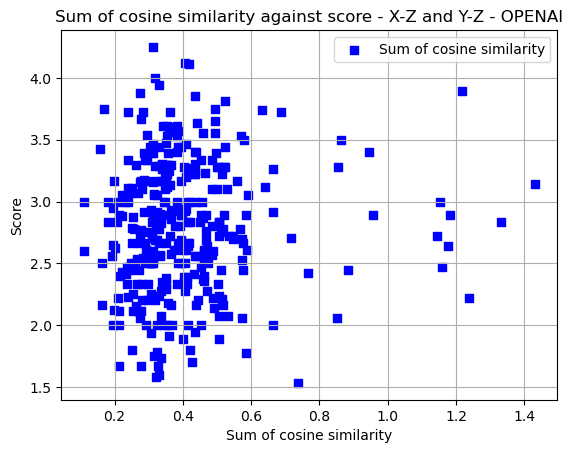

In [37]:
### Difference between X-Z and Y-Z == OPENAI
sum_cosdists = [row[7]+row[8] for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Sum of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Sum of cosine similarity")
plt.title("Sum of cosine similarity against score - X-Z and Y-Z - OPENAI")
plt.legend()
plt.grid()

# Show plot
plt.show()


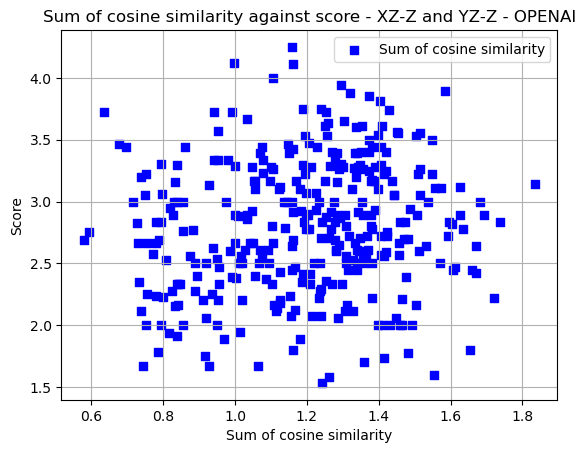

In [39]:
### Sum between XZ-Z and YZ-Z == OPENAI
sum_cosdists = [abs(row[14]+row[13]) for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Sum of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Sum of cosine similarity")
plt.title("Sum of cosine similarity against score - XZ-Z and YZ-Z - OPENAI")
plt.legend()
plt.grid()

# Show plot
plt.show()



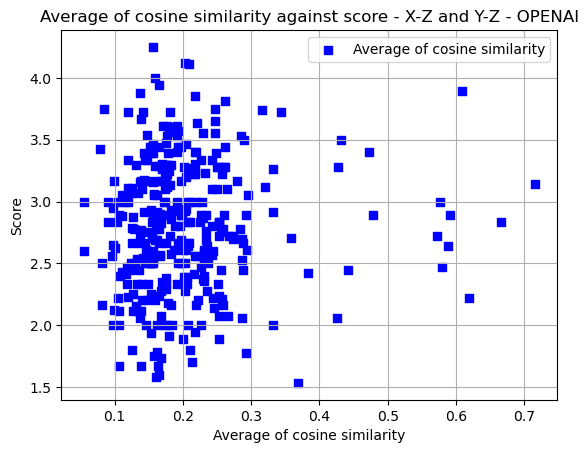

In [38]:
### Average between X-Z and Y-Z == OPENAI
sum_cosdists = [(row[7]+row[8])/2 for row in data]   # First column (x-axis)
rating = [row[6] for row in data]  # Second column (y-axis 1)

#plt.xscale('log')

plt.scatter(sum_cosdists, rating, label="Average of cosine similarity", marker="s", color="b")

# Add labels, title, and legend
plt.ylabel("Score")
plt.xlabel("Average of cosine similarity")
plt.title("Average of cosine similarity against score - X-Z and Y-Z - OPENAI")
plt.legend()
plt.grid()

# Show plot
plt.show()
